In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("car data.csv")
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [5]:
data.describe(include = 'all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


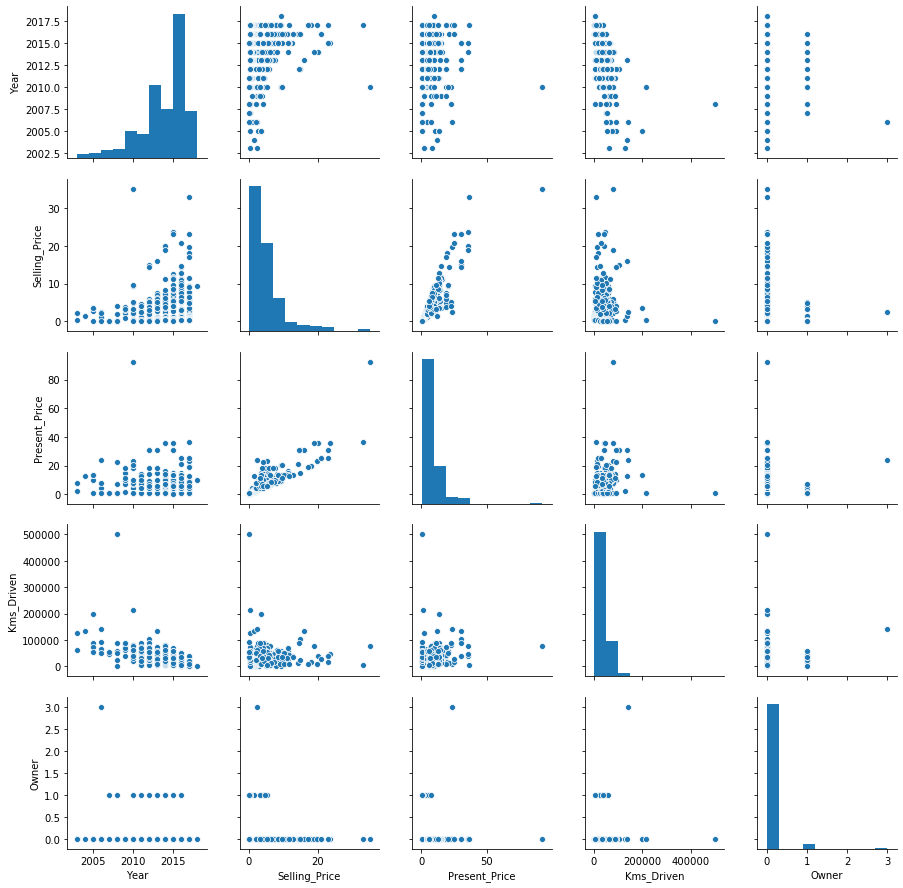

In [6]:

sns.pairplot(data)

Now Lets Check few Hypothesis

Hypothesis - 1 :Less Driven cars have high selling price

Hypothesis - 2 :Latest Cars will have high selling price

Hypothesis - 3 :Automatic Transmission Cars have high selling price


Lets check our hypothesis

# Hypothesis - 1 

In [7]:
# Less Drive Cars have high selling price

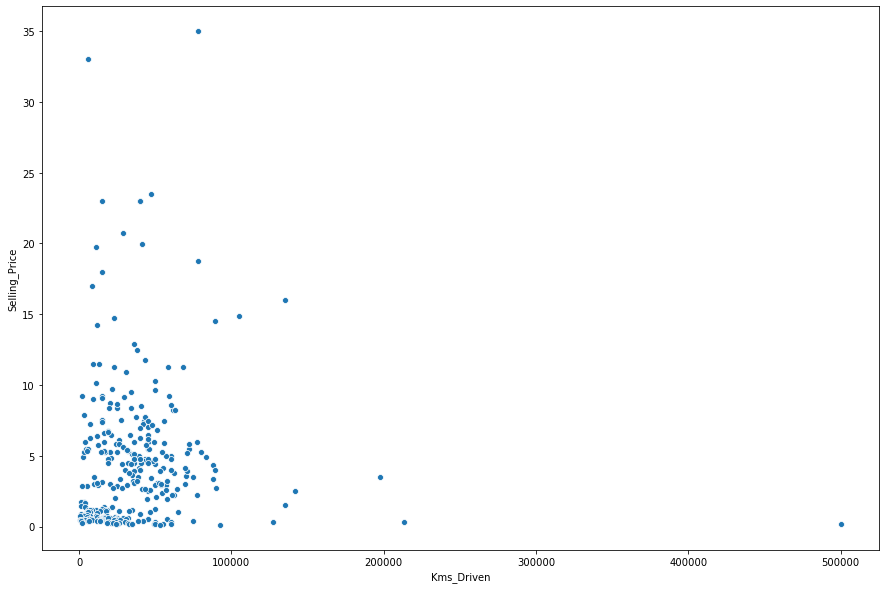

In [8]:
fig,ax1 = plt.subplots(figsize = (15,10))
sns.scatterplot(x='Kms_Driven' , y ="Selling_Price",data = data , ax = ax1)

# Hypothesis - 2

In [9]:
#Latest Cars will have high selling price

In [10]:
data['latest_car_year'] = 2020 - data.Year
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,latest_car_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


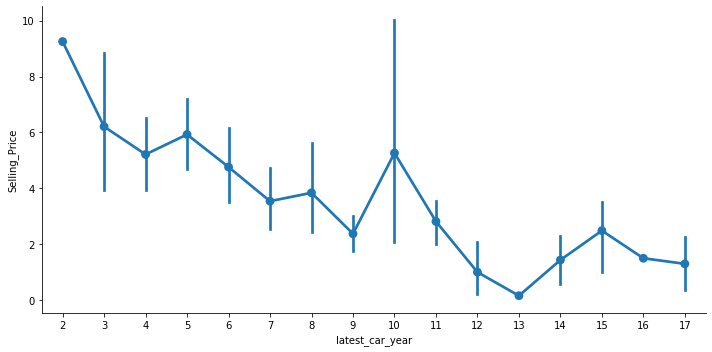

In [11]:
sns.catplot(x='latest_car_year',y='Selling_Price',data=data,kind= 'point' ,height = 5,aspect = 2)

In [12]:
#Second hypothesis is also true

# Hypothesis - 3

In [13]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c3c2bd710>],
      dtype=object)

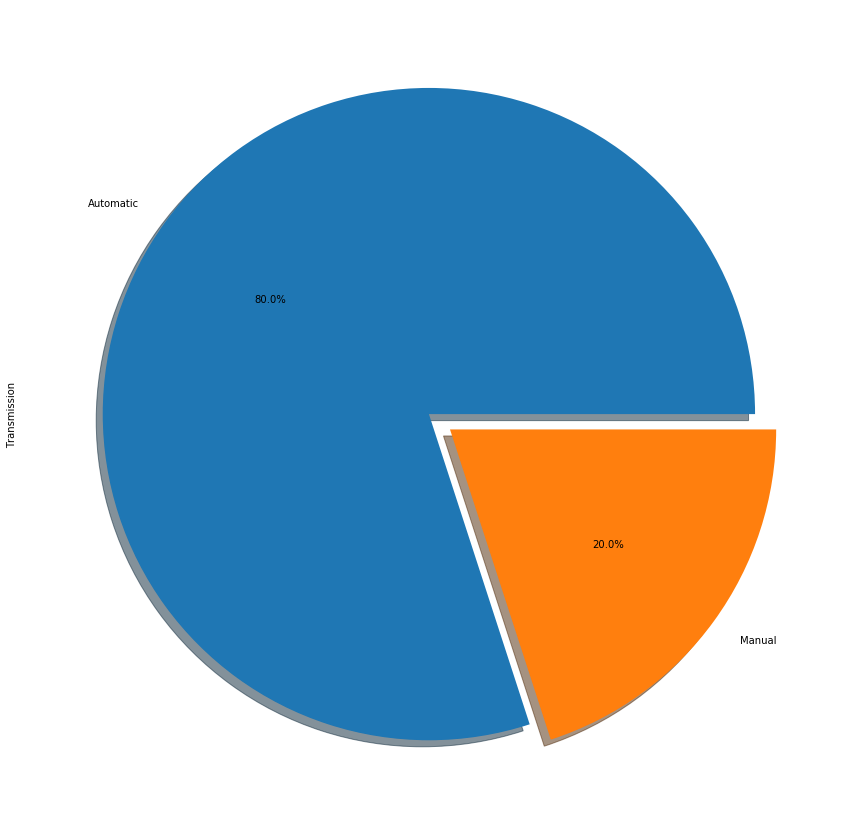

In [14]:
data.loc[:,['Transmission','Selling_Price']].sort_values(by=['Selling_Price'],ascending = False)['Transmission'].head(15).value_counts().plot.pie(figsize=(15,15),subplots = True , autopct = '%.1f%%',explode=[0,.08],shadow=True)

In [15]:
#Top 15 cars with high sale price have Automatic transmission.That proves our 3rd hypothesis

#Now Lets get in to prediction

In [16]:
label = LabelEncoder()
data1 = pd.get_dummies(data['Fuel_Type'],prefix = 'FT' , drop_first = True)
data1.head()

,FT_Diesel,FT_Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [17]:
data['Seller_Type'] = label.fit_transform(data['Seller_Type'])
data['Transmission'] = label.fit_transform(data['Transmission'])


In [18]:
data = pd.concat([data,data1],axis = 1)
data.drop(['Fuel_Type'],axis=1,inplace=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,latest_car_year,FT_Diesel,FT_Petrol
0,ritz,2014,3.35,5.59,27000,0,1,0,6,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,7,1,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,3,0,1
3,wagon r,2011,2.85,4.15,5200,0,1,0,9,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,6,1,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
Car_Name           301 non-null object
Year               301 non-null int64
Selling_Price      301 non-null float64
Present_Price      301 non-null float64
Kms_Driven         301 non-null int64
Seller_Type        301 non-null int64
Transmission       301 non-null int64
Owner              301 non-null int64
latest_car_year    301 non-null int64
FT_Diesel          301 non-null uint8
FT_Petrol          301 non-null uint8
dtypes: float64(2), int64(6), object(1), uint8(2)
memory usage: 21.8+ KB


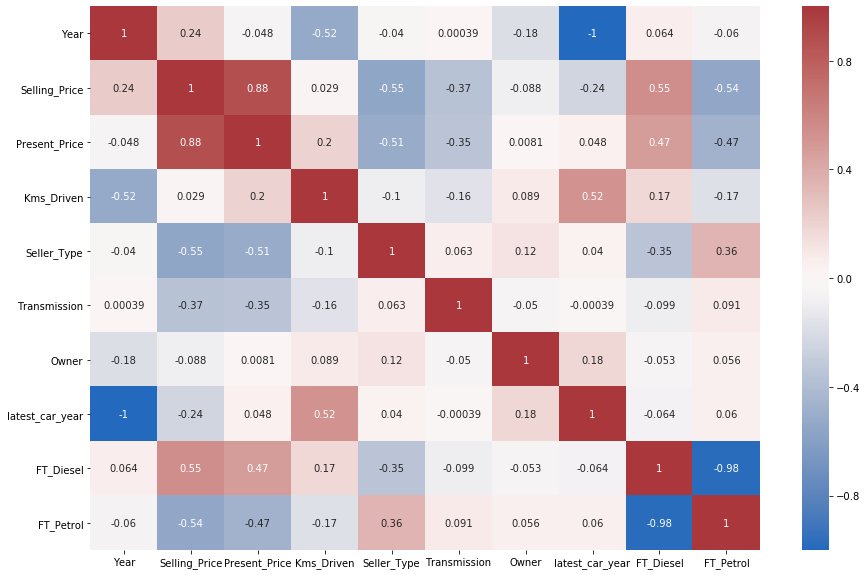

In [20]:
fig , ax2 = plt.subplots(figsize = (15,10))
sns.heatmap(data.corr() , annot= True , ax =ax2 , cmap = sns.cm.vlag)

In [21]:
#The Selling Price has Strong Correlation with Year and Present Price , Diesel Fuel Type of the car

#I am gonna create 2 models

#Model with all features
#Model with Strong Correlated features

In [52]:
def model(x,y):
    training_x ,testing_x ,training_y ,testing_y = train_test_split(x,y,test_size=0.30,random_state =10)
    li_model = LinearRegression()
    li_model.fit(training_x,training_y)
    print("Training Sucessfully Done !!!!!!")
    y_pred = li_model.predict(testing_x)
    
  
    fig,ax1 = plt.subplots(figsize=(15,8))
    fig = sns.scatterplot(testing_y,y_pred,ax=ax1)
    plt.xlabel('Y true')
    plt.ylabel('Y predicted')
    plt.title('True vs Predicted')
    plt.show(fig)


# Model 1


Training Sucessfully Done !!!!!!


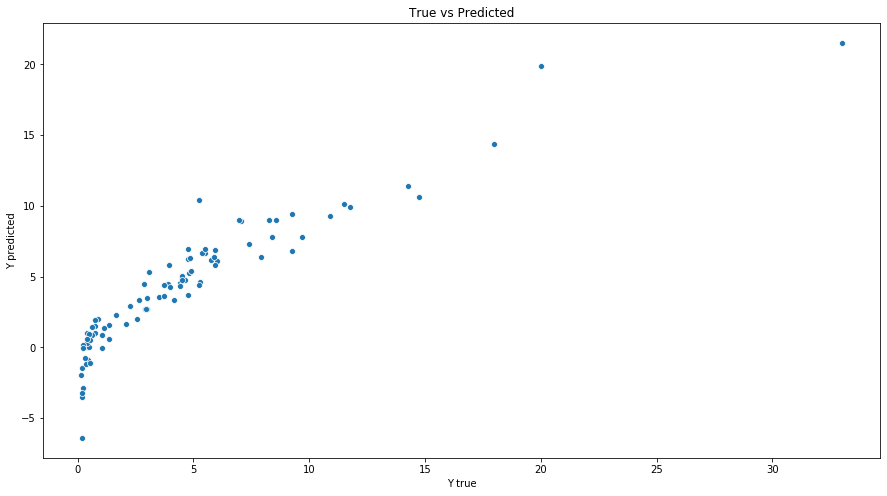

In [53]:
x = data.drop(['Car_Name','Selling_Price'] ,axis = 1)
y= data['Selling_Price']
model(x,y)

# Model 2


Training Sucessfully Done !!!!!!


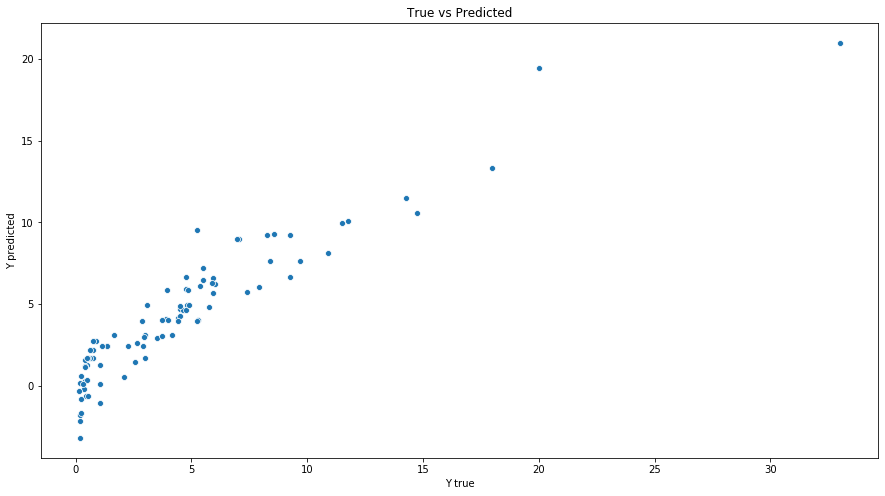

In [54]:
x = data.drop(['Car_Name','Selling_Price','Kms_Driven','Seller_Type','Transmission','Owner', 'latest_car_year','FT_Petrol'],axis = 1)
y = data['Selling_Price']
model(x,y)
